In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Dataset

In [2]:
path = "https://raw.githubusercontent.com/SasinduChanakaPiyumal/AI_ML/refs/heads/main/Titanic-Dataset.csv"
data = pd.read_csv(path)
df = pd.DataFrame(data)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Missing Value

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Check for Duplicates

In [6]:
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


## Distributhion Plots

### Histogram and Boxplot for Numerical Data

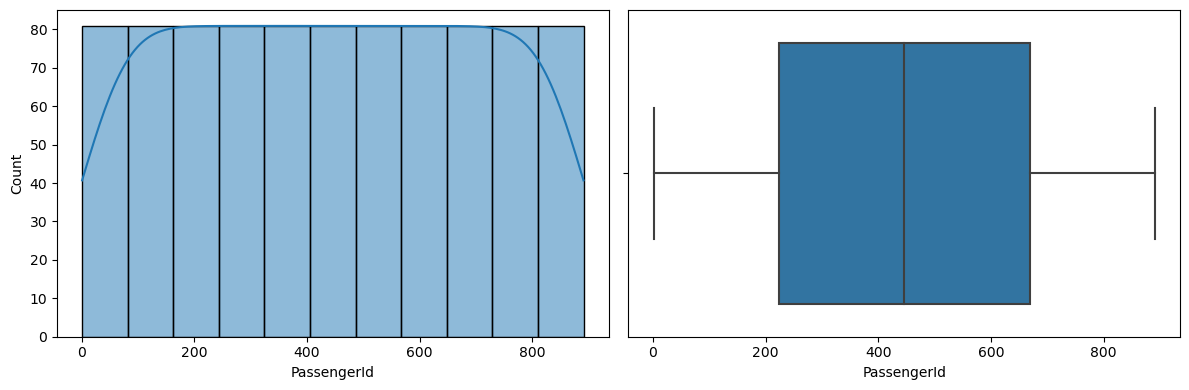

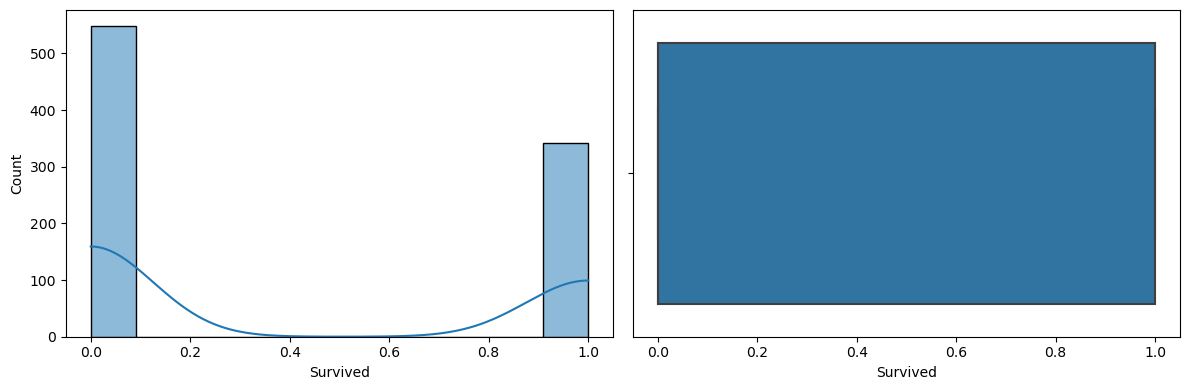

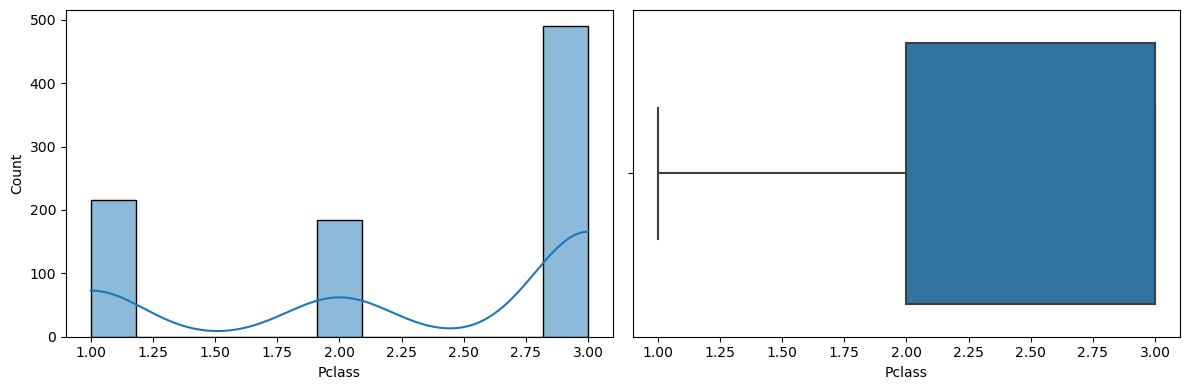

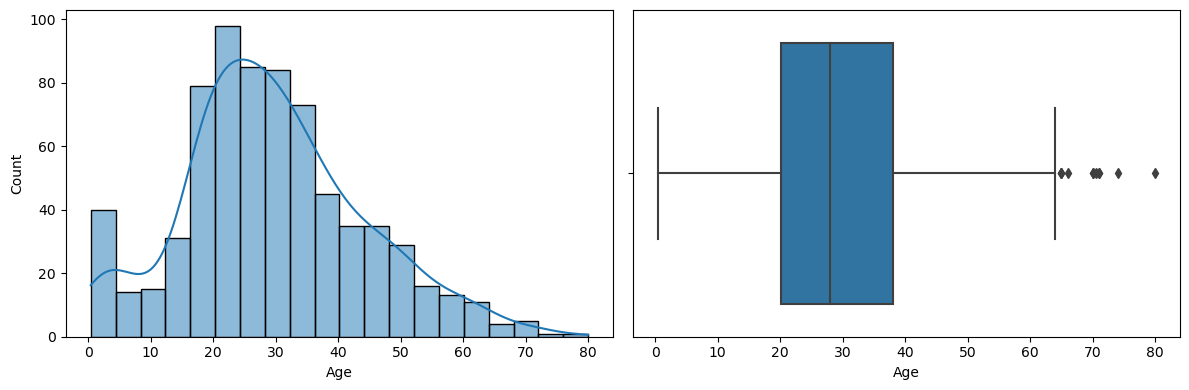

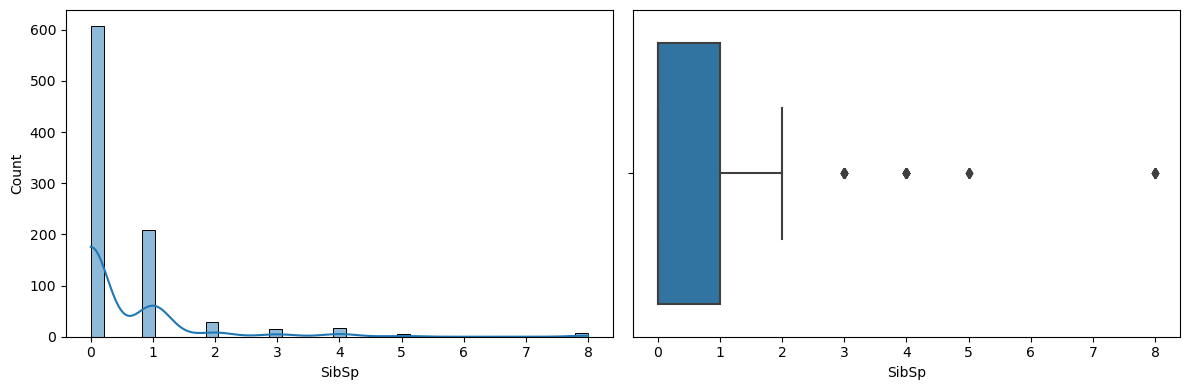

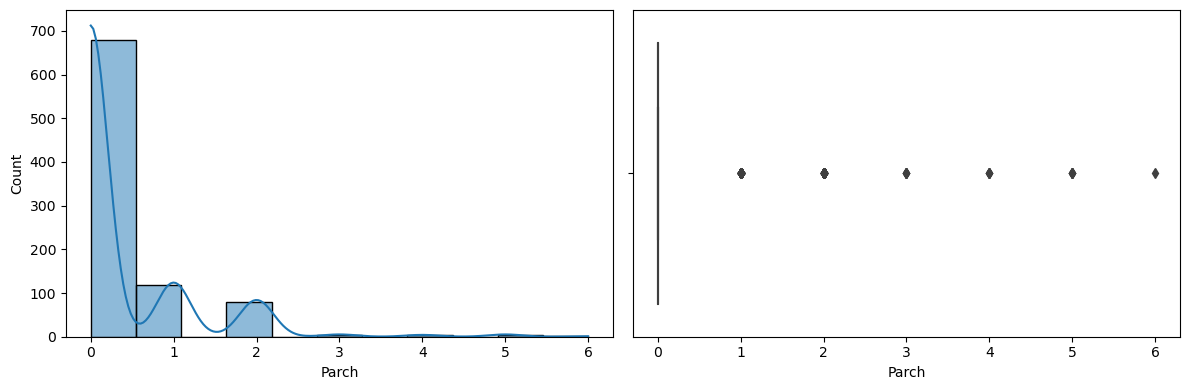

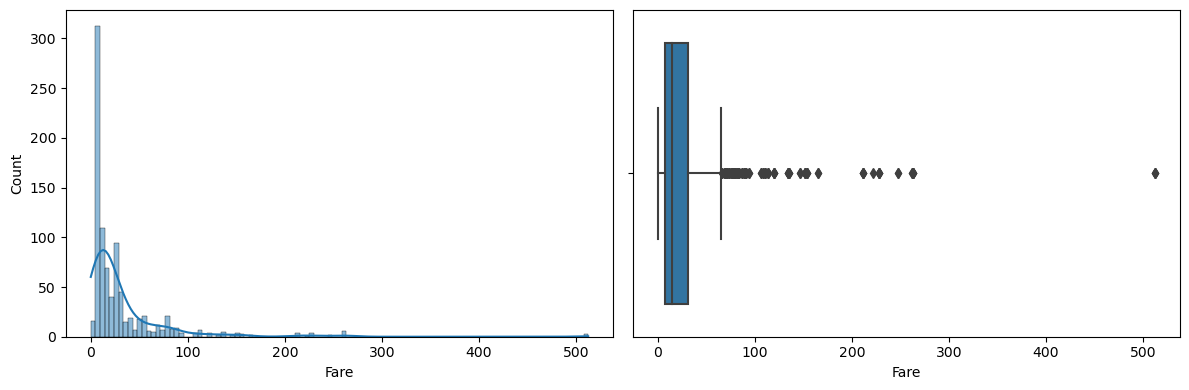

In [7]:
numeric_vals = df.select_dtypes(include='number').columns

for col in numeric_vals:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.tight_layout()
    plt.show()

### Count Plots for Categorical Data

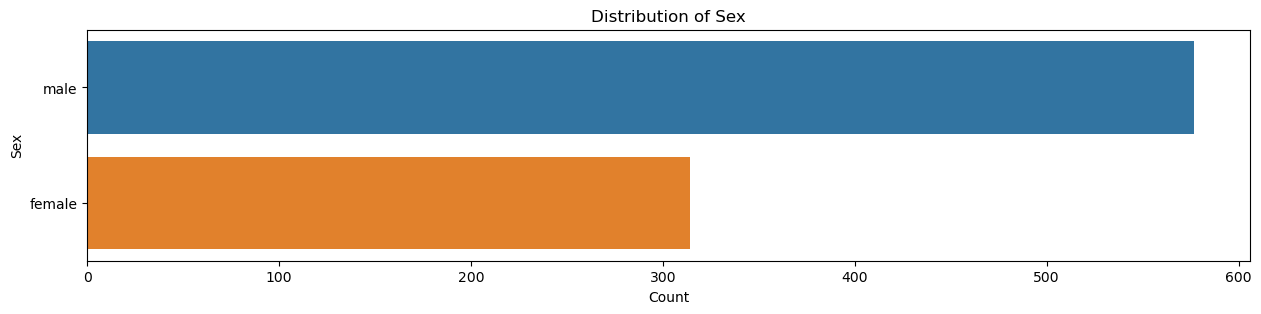

In [8]:
plt.figure(figsize=(15,3))
sns.countplot(y = 'Sex', data = df, order = df['Sex'].value_counts().index)
plt.title(f'Distribution of Sex')
plt.xlabel('Count')
plt.ylabel('Sex')
plt.show()

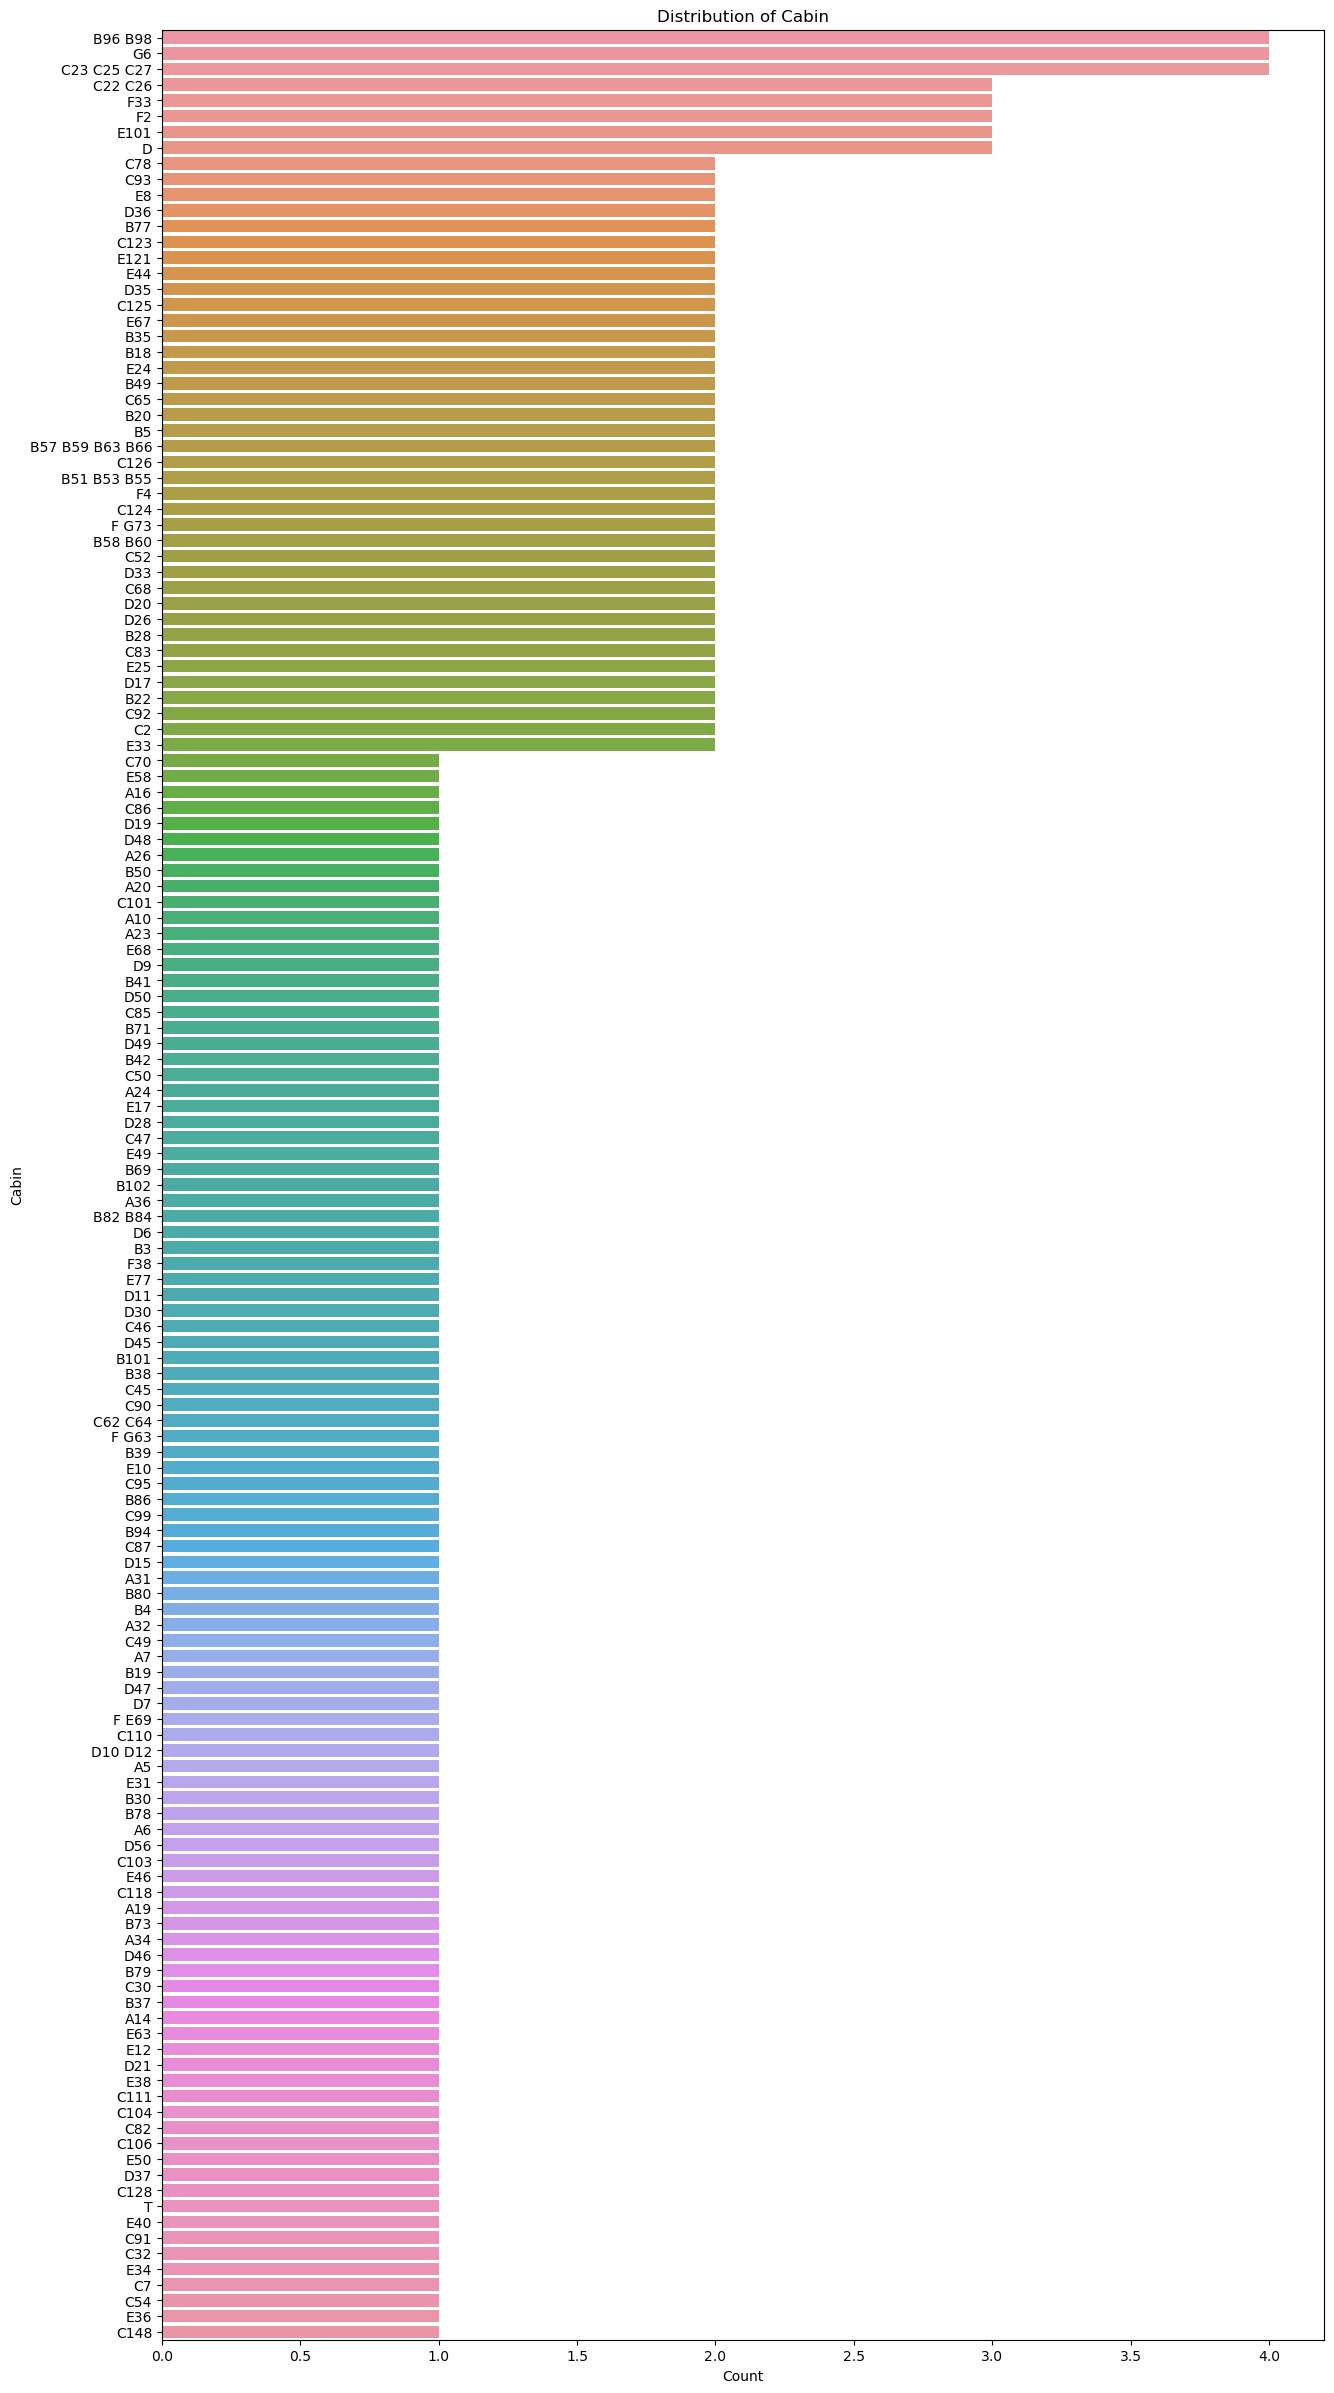

In [9]:
plt.figure(figsize=(15,30))
sns.countplot(y = 'Cabin', data = df, order = df['Cabin'].value_counts().index)
plt.title(f'Distribution of Cabin')
plt.xlabel('Count')
plt.ylabel('Cabin')
plt.show()

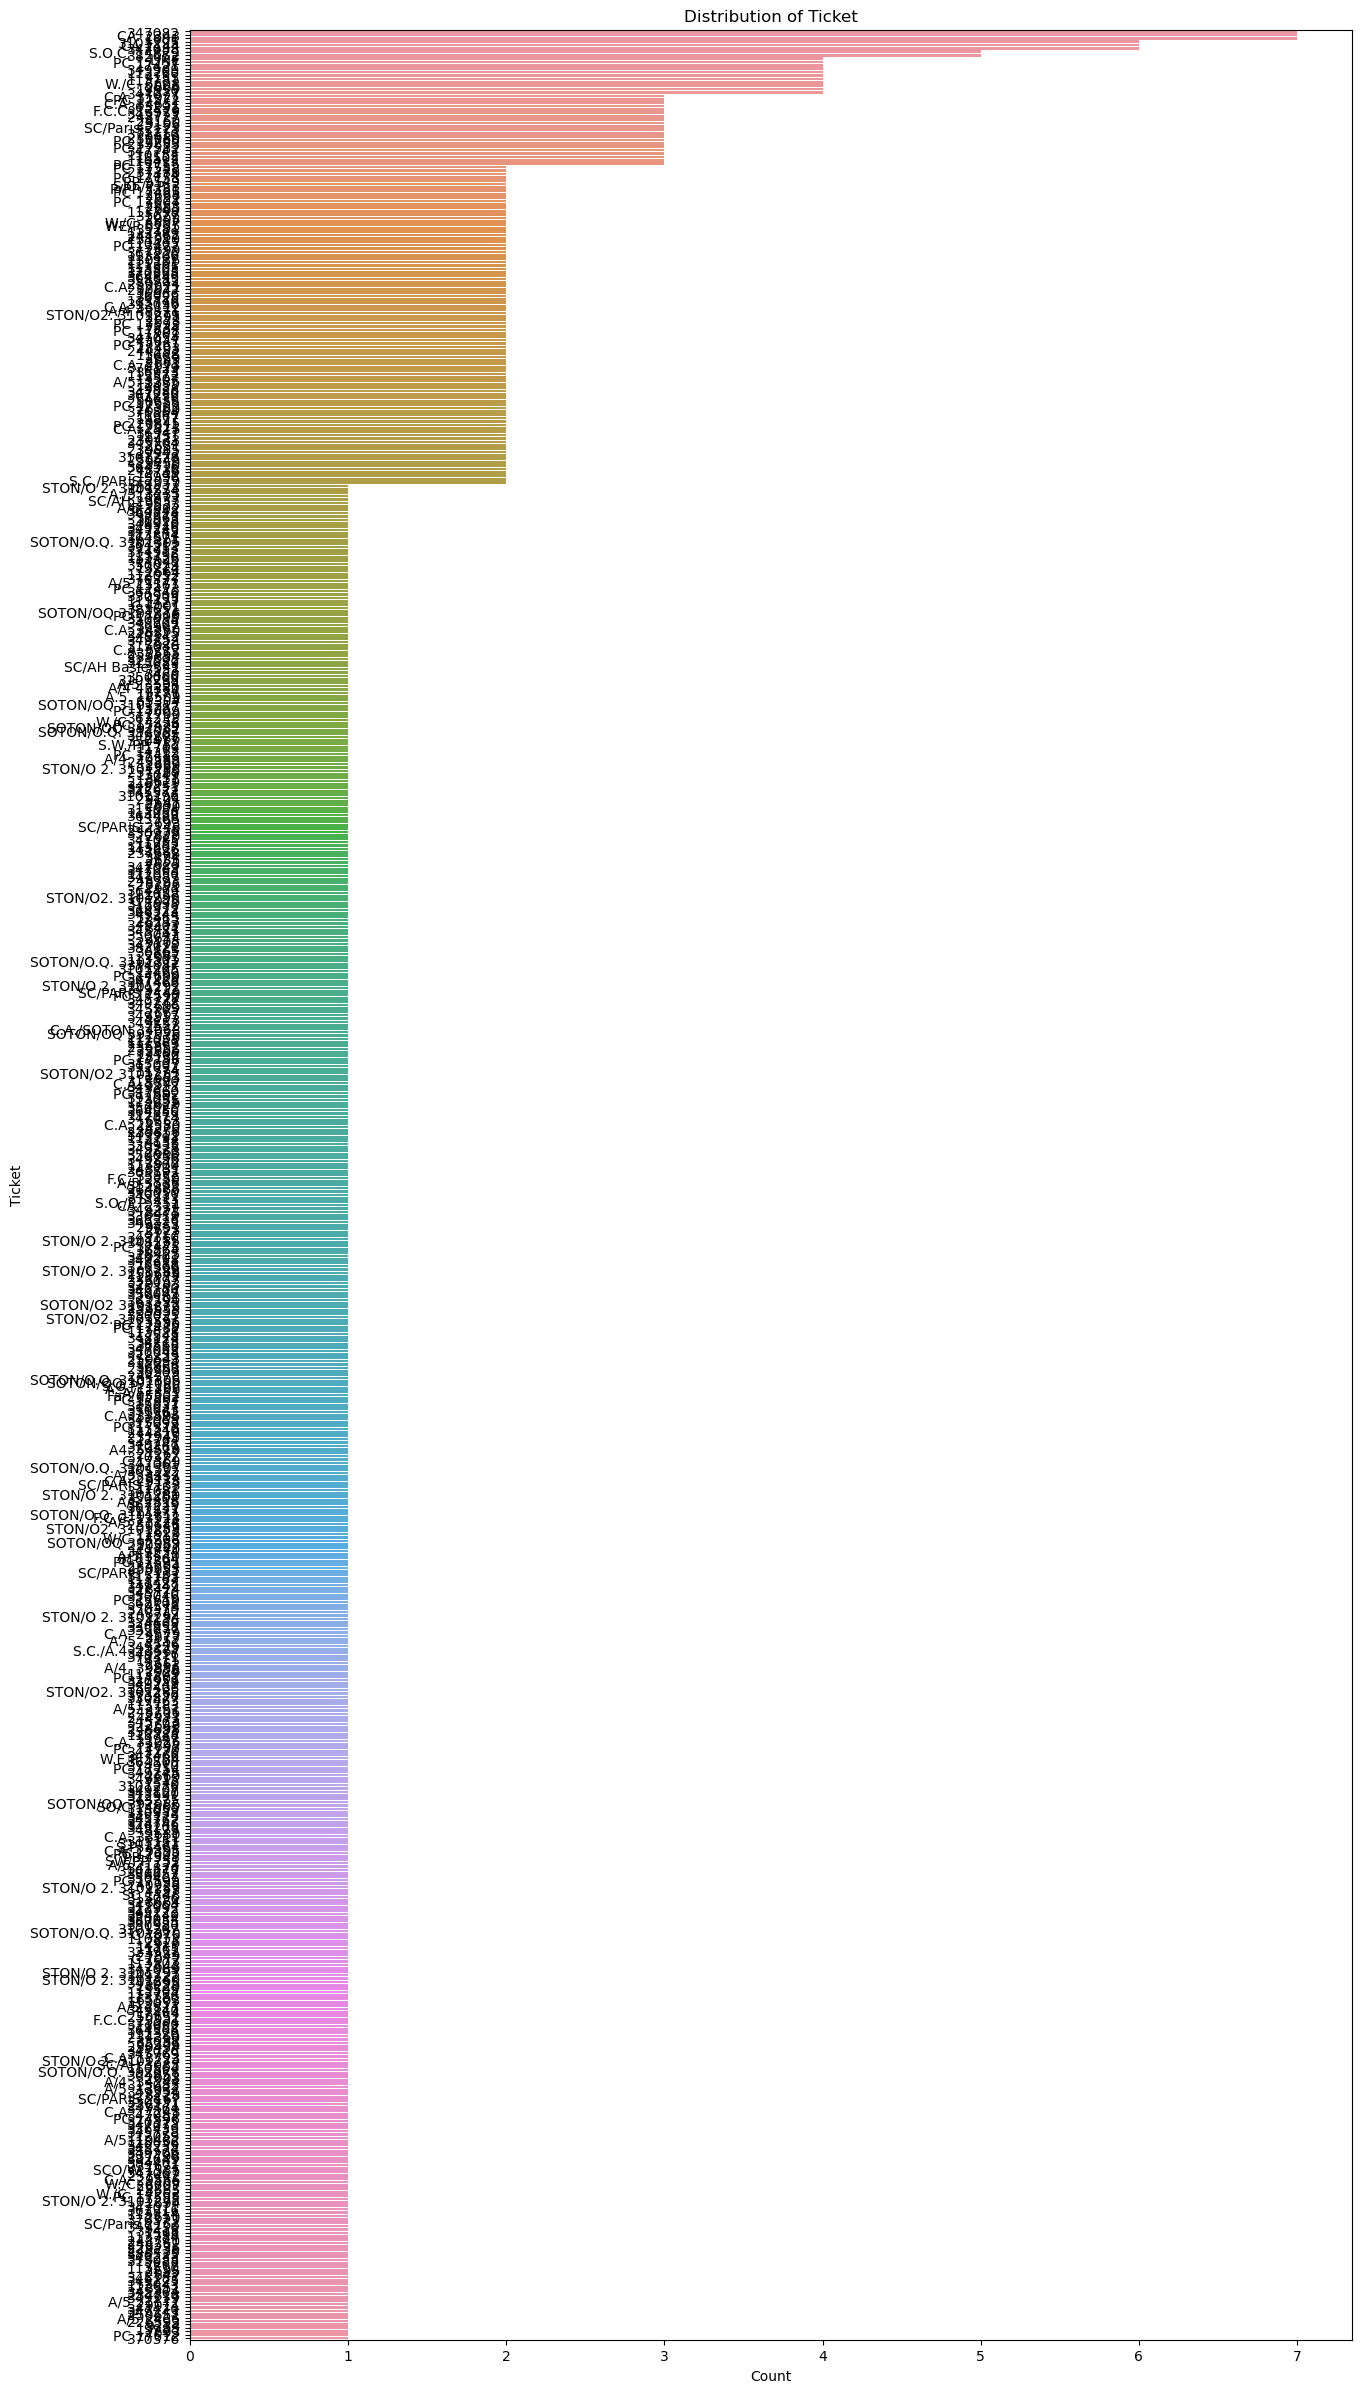

In [10]:
plt.figure(figsize=(15,30))
sns.countplot(y = 'Ticket', data = df, order = df['Ticket'].value_counts().index)
plt.title(f'Distribution of Ticket')
plt.xlabel('Count')
plt.ylabel('Ticket')
plt.show()

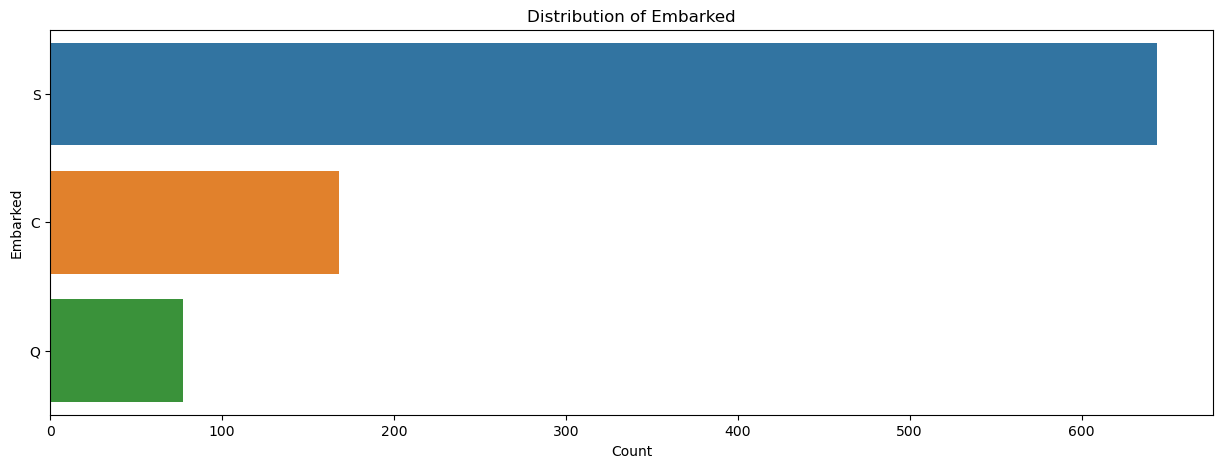

In [11]:
plt.figure(figsize=(15,5))
sns.countplot(y = 'Embarked', data = df, order = df['Embarked'].value_counts().index)
plt.title(f'Distribution of Embarked')
plt.xlabel('Count')
plt.ylabel('Embarked')
plt.show()

## Handling Missing Values

### Fill Missing Values

#### The Age column filled with median because of having skewed distribution.

In [12]:
df['Age'] = df['Age'].fillna(df['Age'].median())

#### The Embarked column filled with mode accoring to filling categorical missing values. 

In [13]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode().iloc[0])

#### The cabin column has 687 missing values it is more than 75% from the whole observations. So that I ceated new category as Unknown and assigned them in to it.

In [14]:
df['Cabin'] = df['Cabin'].fillna('Unknown')

In [15]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## Feature Engineering

In [16]:
df['Ticket'].value_counts()

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [17]:
df['Ticket_clean'] = df['Ticket'].str.replace(r'[^a-zA-Z]', '', regex=True)

In [18]:
df['Ticket_clean'].value_counts()

Ticket_clean
             661
PC            60
CA            41
A             28
STONO         18
SOTONOQ       15
WC            10
SCPARIS        7
SOC            6
C              5
FCC            5
LINE           4
SCParis        4
WEP            3
PP             3
SOPP           3
SOTONO         2
SCAH           2
SWPP           2
PPP            2
FC             1
SCAHBasle      1
AS             1
SOP            1
SC             1
SCOW           1
Fa             1
SP             1
SCA            1
CASOTON        1
Name: count, dtype: int64

In [19]:
df['Ticket_clean'] = df['Ticket_clean'].fillna('NoLetter')

In [20]:
df_encoded = pd.get_dummies(df, columns=['Sex','Embarked','Ticket_clean'])

In [21]:
df_encoded.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Ticket_clean_SOC,Ticket_clean_SOP,Ticket_clean_SOPP,Ticket_clean_SOTONO,Ticket_clean_SOTONOQ,Ticket_clean_SP,Ticket_clean_STONO,Ticket_clean_SWPP,Ticket_clean_WC,Ticket_clean_WEP
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,Unknown,...,False,False,False,False,False,False,False,False,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,...,False,False,False,False,False,False,False,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,Unknown,...,False,False,False,False,False,False,True,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,...,False,False,False,False,False,False,False,False,False,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,Unknown,...,False,False,False,False,False,False,False,False,False,False


In [22]:
df_encoded.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Ticket_clean_', 'Ticket_clean_A',
       'Ticket_clean_AS', 'Ticket_clean_C', 'Ticket_clean_CA',
       'Ticket_clean_CASOTON', 'Ticket_clean_FC', 'Ticket_clean_FCC',
       'Ticket_clean_Fa', 'Ticket_clean_LINE', 'Ticket_clean_PC',
       'Ticket_clean_PP', 'Ticket_clean_PPP', 'Ticket_clean_SC',
       'Ticket_clean_SCA', 'Ticket_clean_SCAH', 'Ticket_clean_SCAHBasle',
       'Ticket_clean_SCOW', 'Ticket_clean_SCPARIS', 'Ticket_clean_SCParis',
       'Ticket_clean_SOC', 'Ticket_clean_SOP', 'Ticket_clean_SOPP',
       'Ticket_clean_SOTONO', 'Ticket_clean_SOTONOQ', 'Ticket_clean_SP',
       'Ticket_clean_STONO', 'Ticket_clean_SWPP', 'Ticket_clean_WC',
       'Ticket_clean_WEP'],
      dtype='object')

#### Becouse of havong more than 75% missing values, Cabin column can be removed. and no cause having name and passenger id , So they are also removed.

In [23]:
df_final = df_encoded.drop(columns=['PassengerId', 'Name','Ticket','Cabin'])

In [24]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Survived                891 non-null    int64  
 1   Pclass                  891 non-null    int64  
 2   Age                     891 non-null    float64
 3   SibSp                   891 non-null    int64  
 4   Parch                   891 non-null    int64  
 5   Fare                    891 non-null    float64
 6   Sex_female              891 non-null    bool   
 7   Sex_male                891 non-null    bool   
 8   Embarked_C              891 non-null    bool   
 9   Embarked_Q              891 non-null    bool   
 10  Embarked_S              891 non-null    bool   
 11  Ticket_clean_           891 non-null    bool   
 12  Ticket_clean_A          891 non-null    bool   
 13  Ticket_clean_AS         891 non-null    bool   
 14  Ticket_clean_C          891 non-null    bo

### Feature scaling

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_final), columns=df_final.columns)

In [27]:
df_scaled

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Ticket_clean_SOC,Ticket_clean_SOP,Ticket_clean_SOPP,Ticket_clean_SOTONO,Ticket_clean_SOTONOQ,Ticket_clean_SP,Ticket_clean_STONO,Ticket_clean_SWPP,Ticket_clean_WC,Ticket_clean_WEP
0,0.0,1.0,0.271174,0.125,0.000000,0.014151,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.472229,0.125,0.000000,0.139136,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.321438,0.000,0.000000,0.015469,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.434531,0.125,0.000000,0.103644,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.434531,0.000,0.000000,0.015713,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,0.5,0.334004,0.000,0.000000,0.025374,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
887,1.0,0.0,0.233476,0.000,0.000000,0.058556,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
888,0.0,1.0,0.346569,0.125,0.333333,0.045771,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
889,1.0,0.0,0.321438,0.000,0.000000,0.058556,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Visualize Boxplots

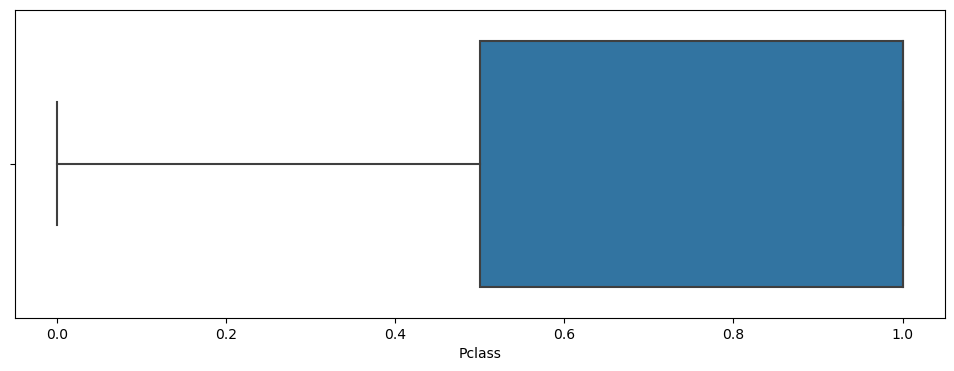

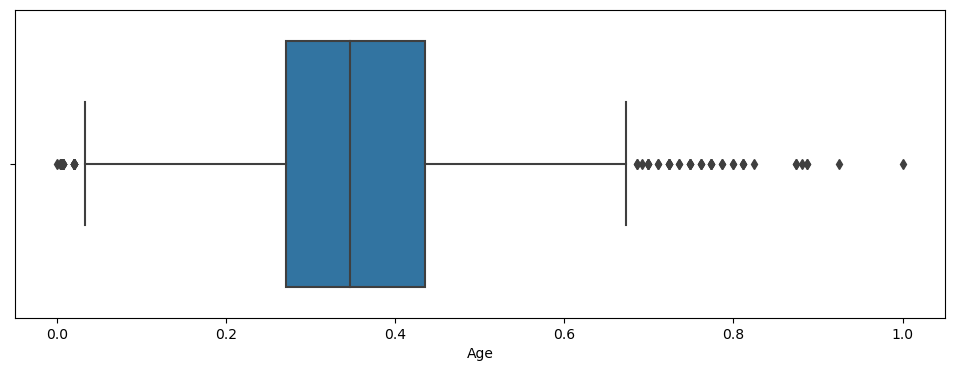

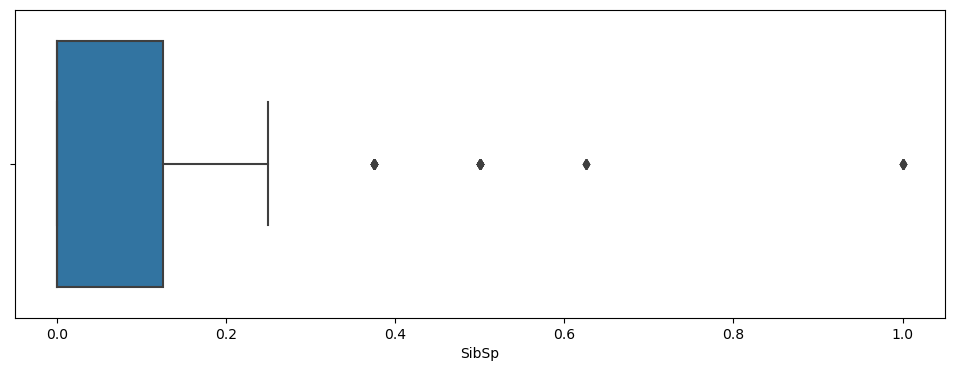

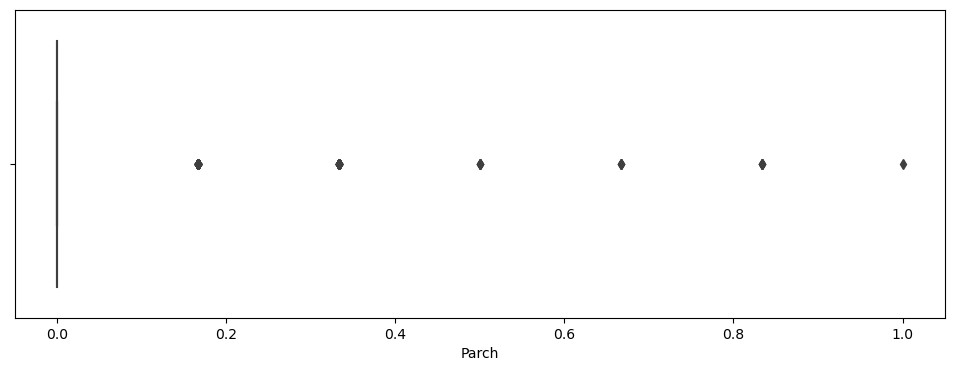

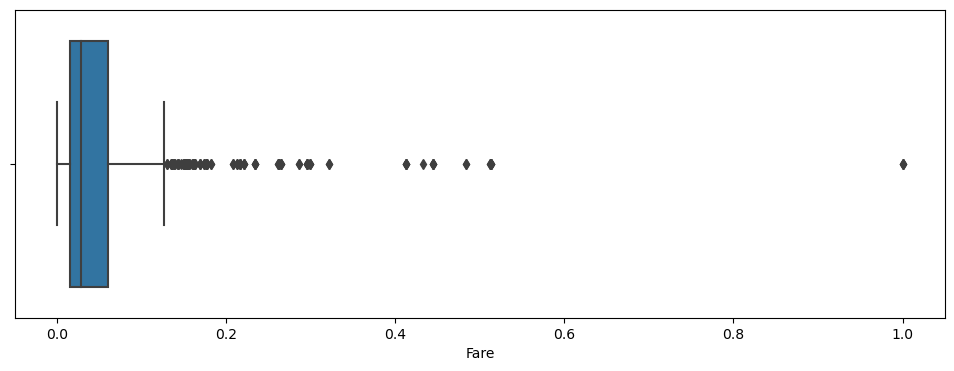

In [28]:
cols = ['Pclass','Age','SibSp','Parch','Fare']

for col in cols:
    plt.figure(figsize=(12, 4))
    sns.boxplot(x=df_scaled[col])
    plt.show()

In [29]:
df_scaled = df_scaled[(df_scaled['Fare'] < 0.4) & (df_scaled['Parch'] < 0.5)]

In [30]:
df_scaled.shape

(857, 41)

In [31]:
df_scaled.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,Ticket_clean_SOC,Ticket_clean_SOP,Ticket_clean_SOPP,Ticket_clean_SOTONO,Ticket_clean_SOTONOQ,Ticket_clean_SP,Ticket_clean_STONO,Ticket_clean_SWPP,Ticket_clean_WC,Ticket_clean_WEP
0,0.0,1.0,0.271174,0.125,0.0,0.014151,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.472229,0.125,0.0,0.139136,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.321438,0.000,0.0,0.015469,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.434531,0.125,0.0,0.103644,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.434531,0.000,0.0,0.015713,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
